# Reference guide: How to handle outliers

You might want to save a copy of this guide for future reference. You can use it as a resource for additional practice or in your future professional projects. To access a downloadable version of this course item, click the link below and select “Use Template.” 

Previously, you watched two videos about how to detect outliers and why handling outliers can be an important part of data cleaning. At this point, you likely have a good understanding of this. It is important to not only detect outliers, but also to have a plan for them.

That is precisely what you will review in this reading. Once you’ve detected outliers in your dataset—whether global, contextual, or collective—how do you handle them? When it comes to exploratory data analysis, or EDA, there are essentially three main ways to handle outliers: delete, reassign, or leave them in.

Whether you keep outliers as they are, delete them, or reassign values is a decision that you make on a dataset-by-dataset basis. To help you make the decision, you can start with these general guidelines:

- **Delete them**: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least. 
    
- **Reassign them**: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values. 
    
- **Leave them**: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.
    

The videos discussing outliers went into detail on how to handle outliers when you leave them in the dataset. In this reading, you will learn about some techniques for deleting and reassigning outliers. 

## **1. Delete them.** 

For one way to delete outlier values, recall the coding you saw in the walkthrough video on outliers. In that video, the instructor coded a box plot to help you visualize two different outliers, as shown here:

**Note:** The following code block is not interactive.

In [ ]:
box = sns.boxplot(x=df['number_of_strikes'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Number of strikes')
plt.title('Yearly number of lightning strikes');

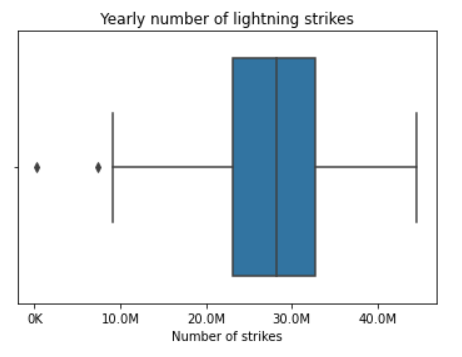

The instructor then used the following code to find the lower limit—8.6M.  

In [ ]:
# Calculate 25th percentile of annual strikes
percentile25 = df['number_of_strikes'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df['number_of_strikes'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: ', lower_limit)

Reset

Lower limit is:  8585016.625

Next, a Boolean mask was used to filter the dataframe so it only contained rows where the number of strikes was less than the lower limit.

In [ ]:
print(df[df['number_of_strikes'] < lower_limit])

RunReset

    number_of_strikes  year
1              209166  2019
33            7378836  1987

Once you know the cutoff points for outliers, if you want to delete them, you can use a Boolean mask to select all rows such that: lower limit ≤ values ≤ upper limit. 

In [ ]:
mask = (df['number_of_strikes'] >= lower_limit) & (df['number_of_strikes'] <=

upper_limit)

df = df[mask].copy()

print(df)

RunReset

    number_of_strikes  year
0            15620068  2020
2            44600989  2018
3            35095195  2017
4            41582229  2016
5            37894191  2015
6            34919173  2014
7            27600898  2013
8            28807552  2012
9            31392058  2011
10           29068965  2010
11           30100585  2009
12           29790934  2008
13           30529064  2007
14           33292382  2006
15           38168699  2005
16           40023951  2004
17           39092327  2003
18           29916767  2002
19           25470095  2001
20           26276135  2000
21           27758681  1999
22           28802221  1998
23           26986915  1997
24           26190094  1996
25           22763540  1995
26           25094010  1994
27           24206929  1993
28           16371876  1992
29           16900934  1991
30           15839052  1990
31           14245186  1989
32            9150440  1988

Next, you’ll consider reassigning outliers by deriving new values that are a better fit for the dataset.

## **2. Reassigning them.**

Instead of deleting outliers, you can always reassign them, that is, change the values to ones that fit within the general distribution of the dataset. There are two common ways to do this, but many different ways can be used, depending on your use case:

**1. Create a floor and ceiling at a quantile:** For example, you could place walls at the 90th and 10th percentile of the distribution of data values. Any value above the 90% mark or below the 10% mark are changed to fit within the walls you set. Here is an example of what that code might look like:

In [ ]:
# Calculate 10th percentile

tenth_percentile = np.percentile(df['number_of_strikes'], 10)

# Calculate 90th percentile

ninetieth_percentile = np.percentile(df['number_of_strikes'], 90)

# Apply lambda function to replace outliers with thresholds defined above

df['number_of_strikes'] = df['number_of_strikes'].apply(lambda x: (

    tenth_percentile if x < tenth_percentile 

    else ninetieth_percentile if x > ninetieth_percentile 

    else x))

RunReset

0     15620068.0
1     14657650.6
2     38815238.6
3     35095195.0
4     38815238.6
5     37894191.0
6     34919173.0
7     27600898.0
8     28807552.0
9     31392058.0
10    29068965.0
11    30100585.0
12    29790934.0
13    30529064.0
14    33292382.0
15    38168699.0
16    38815238.6
17    38815238.6
18    29916767.0
19    25470095.0
20    26276135.0
21    27758681.0
22    28802221.0
23    26986915.0
24    26190094.0
25    22763540.0
26    25094010.0
27    24206929.0
28    16371876.0
29    16900934.0
30    15839052.0
31    14657650.6
32    14657650.6
33    14657650.6
Name: number_of_strikes, dtype: float64

**2. Impute the average:** In some cases, it might be best to reassign all outlier values to match the median or mean value. This will ensure that your median and distribution are based solely on the non-outlier values, leaving the original outliers excluded. The actual imputation or reassigning of values can be pretty simple if you’ve already found the outliers. The following code block calculates the median of the values greater than the lower limit. Then it imputes the median where values are lower than the lower limit.

In [ ]:
# Calculate median of all NON-OUTLIER values
median = np.median(df['number_of_strikes'][df['number_of_strikes'] >= lower_limit])

# Impute the median for all values < lower_limit
df['number_of_strikes'] = np.where(df['number_of_strikes'] < lower_limit, median, df['number_of_strikes'] )

RunReset

[ 15620068.   28804886.5  44600989.   35095195.   41582229.   37894191.
  34919173.   27600898.   28807552.   31392058.   29068965.   30100585.
  29790934.   30529064.   33292382.   38168699.   40023951.   39092327.
  29916767.   25470095.   26276135.   27758681.   28802221.   26986915.
  26190094.   22763540.   25094010.   24206929.   16371876.   16900934.
  15839052.   14245186.    9150440.   28804886.5]

**Note:** Outside of EDA, machine learning and regression modeling have more complex variations on dealing with outliers. You will learn more about those topics later.

## Key Takeaways

After detecting the outliers in a dataset, it is essential that you determine a strategy for how to handle them. Because every dataset and data-based problem is different, your strategy will vary. For the most part, you will be choosing between deleting, reassigning, or leaving outliers.